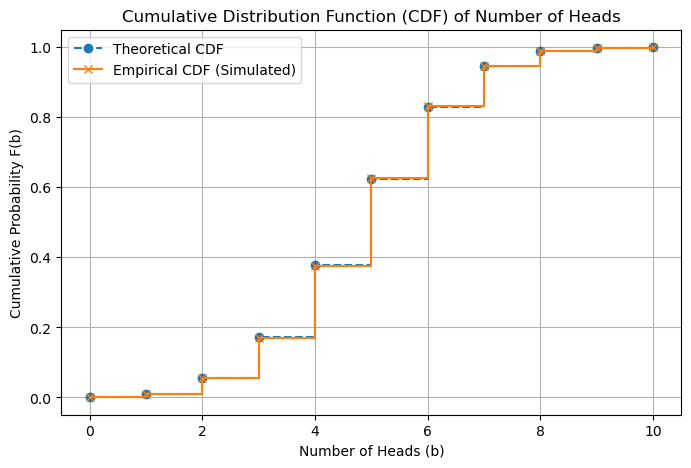

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Step 1: Compute PMF and CDF analytically
n = 10  # Number of coin flips
p = 0.5  # Probability of heads

# Possible values of X (number of heads)
x_values = np.arange(0, n + 1)

# Compute PMF using the binomial distribution
pmf_values = stats.binom.pmf(x_values, n, p)

# Compute CDF
cdf_values = stats.binom.cdf(x_values, n, p)

# Create a table for PMF and CDF
pmf_cdf_table = pd.DataFrame({
    "Number of Heads (X)": x_values,
    "PMF P(X=x)": pmf_values,
    "CDF F(b)": cdf_values
})


# Step 2: Simulate the experiment
num_simulations = 10000
simulated_results = np.random.binomial(n, p, num_simulations)

# Step 3: Compute empirical CDF
empirical_cdf = np.array([np.mean(simulated_results <= b) for b in x_values])

# Step 4: Plot the CDF
plt.figure(figsize=(8, 5))
plt.step(x_values, cdf_values, label="Theoretical CDF", where="post", linestyle="--", marker="o")
plt.step(x_values, empirical_cdf, label="Empirical CDF (Simulated)", where="post", linestyle="-", marker="x")
plt.xlabel("Number of Heads (b)")
plt.ylabel("Cumulative Probability F(b)")
plt.title("Cumulative Distribution Function (CDF) of Number of Heads")
plt.legend()
plt.grid(True)
plt.show()


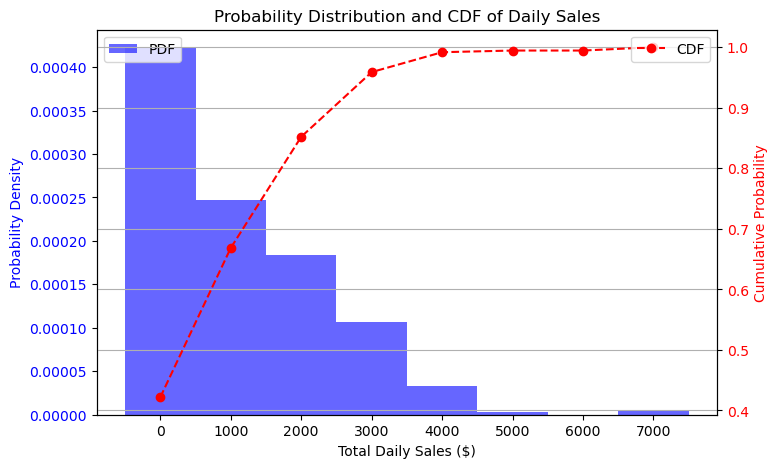

0.0

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
days = 365
customer_min = 5
customer_max = 15

# Simulate daily sales
daily_sales = []

for _ in range(days):
    # Number of customers
    num_customers = np.random.randint(customer_min, customer_max + 1)
    
    # Assign purchase categories based on probabilities
    purchase_types = np.random.choice(
        ["souvenir", "regular", "rare"], 
        size=num_customers, 
        p=[0.6, 0.3, 0.1]
    )
    
    # Generate sales based on purchase type
    sales = []
    for purchase in purchase_types:
        if purchase == "souvenir":
            sales.append(np.random.uniform(10, 50))
        elif purchase == "regular":
            sales.append(np.random.uniform(50, 200))
        else:  # rare item
            sales.append(np.random.uniform(200, 2000))
    
    # Total daily sales
    daily_sales.append(sum(sales))

# Convert to NumPy array
daily_sales = np.array(daily_sales)

# Step 2: Estimate P(X > 10,000)
prob_x_gt_10000 = np.mean(daily_sales > 10000)

# Step 3: Compute the probability distribution in $1,000 increments
bins = np.arange(0, max(daily_sales) + 1000, 1000)
hist, bin_edges = np.histogram(daily_sales, bins=bins, density=True)

# Step 4: Compute and plot the CDF
cdf = np.cumsum(hist * np.diff(bin_edges))  # CDF calculation

# Display probability estimate
prob_x_gt_10000

# Step 5: Plot PDF and CDF
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot PDF
ax1.bar(bin_edges[:-1], hist, width=1000, alpha=0.6, label="PDF", color="blue")
ax1.set_xlabel("Total Daily Sales ($)")
ax1.set_ylabel("Probability Density", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for the CDF
ax2 = ax1.twinx()
ax2.plot(bin_edges[:-1], cdf, color="red", marker="o", linestyle="--", label="CDF")
ax2.set_ylabel("Cumulative Probability", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and Legends
plt.title("Probability Distribution and CDF of Daily Sales")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.grid()
plt.show()

# Display probability estimate
prob_x_gt_10000
